In [68]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

plt.style.use('./deeplearning.mplstyle')
RANDOM_STATE = 55

In [69]:
df = pd.read_csv("sample_malicious_url.csv")
# df.head()

In [70]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])
print(label_encoder.classes_)

['benign' 'defacement' 'malware' 'phishing']


In [71]:
# Exclude the target column
features = [x for x in df.columns if x != 'type']  # Exclude 'type' column
print(len(features))

7


In [72]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 3200
validation samples: 800
target proportion: 1.5147


In [73]:
# Building random forest tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree
# An additionaly hyperparameter for Random Forest is called n_estimators, which is the 
# number of Decision Tress that make up the Random Forest

min_samples_split_list = [2, 5, 10, 15, 20, 30, 40, 50, 60, 80, 100, 150, 200, 250, 300, 700]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 20, 32, 40, 64, None]
n_estimators_list = [10, 20, 50, 75, 100, 200, 500, 1000]

min_samples_split=2, Train Accuracy=0.9847, Validation Accuracy=0.8350
min_samples_split=5, Train Accuracy=0.9653, Validation Accuracy=0.8575
min_samples_split=10, Train Accuracy=0.9313, Validation Accuracy=0.8550
min_samples_split=15, Train Accuracy=0.9072, Validation Accuracy=0.8500
min_samples_split=20, Train Accuracy=0.8881, Validation Accuracy=0.8363
min_samples_split=30, Train Accuracy=0.8669, Validation Accuracy=0.8350
min_samples_split=40, Train Accuracy=0.8584, Validation Accuracy=0.8250
min_samples_split=50, Train Accuracy=0.8522, Validation Accuracy=0.8275
min_samples_split=60, Train Accuracy=0.8369, Validation Accuracy=0.8213
min_samples_split=80, Train Accuracy=0.8306, Validation Accuracy=0.8050
min_samples_split=100, Train Accuracy=0.8163, Validation Accuracy=0.7950
min_samples_split=150, Train Accuracy=0.7744, Validation Accuracy=0.7525
min_samples_split=200, Train Accuracy=0.7503, Validation Accuracy=0.7262
min_samples_split=250, Train Accuracy=0.7434, Validation Accura

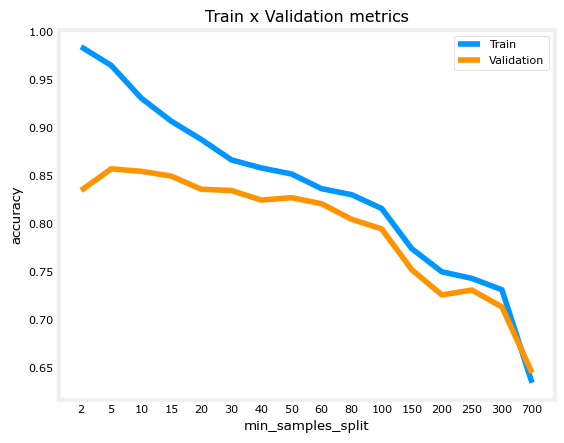

In [74]:
# Min Samples Split

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split=min_samples_split,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

max_depth=1, Train Accuracy=0.5628, Validation Accuracy=0.5575
max_depth=2, Train Accuracy=0.5931, Validation Accuracy=0.6012
max_depth=3, Train Accuracy=0.6719, Validation Accuracy=0.6700
max_depth=4, Train Accuracy=0.7241, Validation Accuracy=0.7063
max_depth=5, Train Accuracy=0.7744, Validation Accuracy=0.7412
max_depth=6, Train Accuracy=0.8072, Validation Accuracy=0.7638
max_depth=7, Train Accuracy=0.8459, Validation Accuracy=0.8125
max_depth=8, Train Accuracy=0.8797, Validation Accuracy=0.8275
max_depth=10, Train Accuracy=0.9269, Validation Accuracy=0.8525
max_depth=12, Train Accuracy=0.9578, Validation Accuracy=0.8475
max_depth=16, Train Accuracy=0.9834, Validation Accuracy=0.8438
max_depth=20, Train Accuracy=0.9847, Validation Accuracy=0.8300
max_depth=32, Train Accuracy=0.9847, Validation Accuracy=0.8350
max_depth=40, Train Accuracy=0.9847, Validation Accuracy=0.8350
max_depth=64, Train Accuracy=0.9847, Validation Accuracy=0.8350
max_depth=None, Train Accuracy=0.9847, Validatio

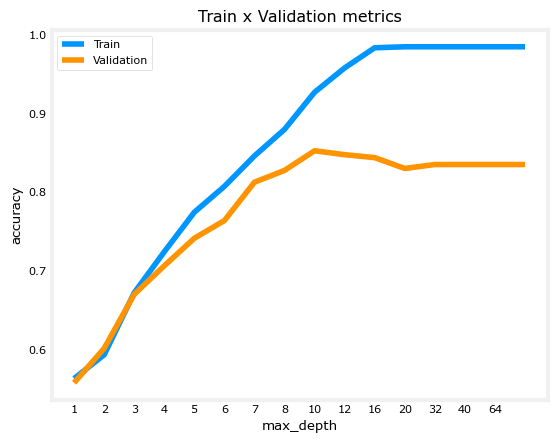

In [75]:
# Max depth

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train','Validation'])

n_estimators=10, Train Accuracy=0.9769, Validation Accuracy=0.8250
n_estimators=20, Train Accuracy=0.9838, Validation Accuracy=0.8350
n_estimators=50, Train Accuracy=0.9847, Validation Accuracy=0.8413
n_estimators=75, Train Accuracy=0.9847, Validation Accuracy=0.8413
n_estimators=100, Train Accuracy=0.9847, Validation Accuracy=0.8350
n_estimators=200, Train Accuracy=0.9847, Validation Accuracy=0.8387
n_estimators=500, Train Accuracy=0.9847, Validation Accuracy=0.8475
n_estimators=1000, Train Accuracy=0.9847, Validation Accuracy=0.8450


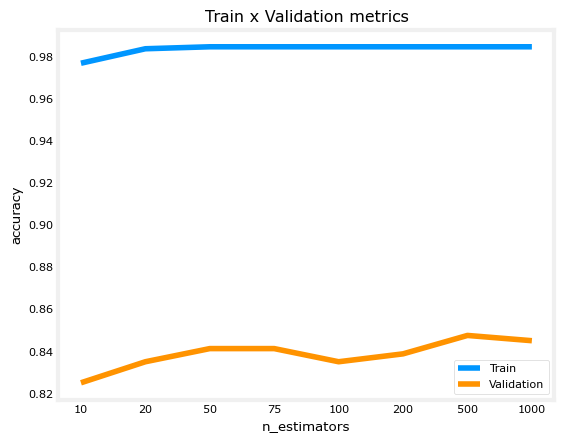

In [76]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"n_estimators={n_estimators}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [77]:
random_forest_model = RandomForestClassifier(n_estimators = 200,
                                             max_depth = 10, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [78]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9012
Metrics test:
	Accuracy score: 0.8450


In [79]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [80]:
eval_set = [(X_train_eval,y_train_eval)]
# early_stopping_rounds = 10

# This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.01,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds=10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-mlogloss:1.37510
[1]	validation_0-mlogloss:1.36412
[2]	validation_0-mlogloss:1.35329
[3]	validation_0-mlogloss:1.34270
[4]	validation_0-mlogloss:1.33234
[5]	validation_0-mlogloss:1.32208
[6]	validation_0-mlogloss:1.31204
[7]	validation_0-mlogloss:1.30220
[8]	validation_0-mlogloss:1.29279
[9]	validation_0-mlogloss:1.28357
[10]	validation_0-mlogloss:1.27450
[11]	validation_0-mlogloss:1.26563
[12]	validation_0-mlogloss:1.25664
[13]	validation_0-mlogloss:1.24788
[14]	validation_0-mlogloss:1.23937
[15]	validation_0-mlogloss:1.23098
[16]	validation_0-mlogloss:1.22278
[17]	validation_0-mlogloss:1.21474
[18]	validation_0-mlogloss:1.20670
[19]	validation_0-mlogloss:1.19892
[20]	validation_0-mlogloss:1.19129
[21]	validation_0-mlogloss:1.18370
[22]	validation_0-mlogloss:1.17629
[23]	validation_0-mlogloss:1.16900
[24]	validation_0-mlogloss:1.16172
[25]	validation_0-mlogloss:1.15463
[26]	validation_0-mlogloss:1.14761
[27]	validation_0-mlogloss:1.14071
[28]	validation_0-mlogloss:1.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [81]:
xgb_model.best_iteration

199

In [82]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train), y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test), y_test):.4f}")

Metrics train:
	Accuracy score: 0.8550
Metrics test:
	Accuracy score: 0.8250


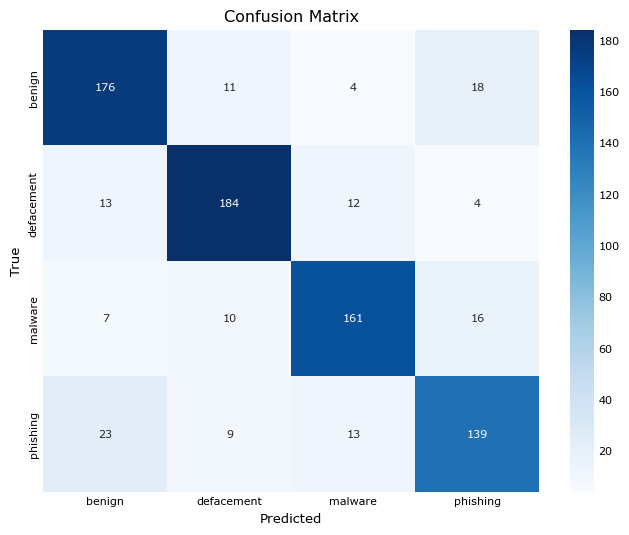

In [83]:
# cm = confusion_matrix(y_test, xgb_model.predict(X_test))
# print(cm)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, xgb_model.predict(X_test))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [84]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       209
           1       0.86      0.86      0.86       213
           2       0.85      0.83      0.84       194
           3       0.79      0.76      0.77       184

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



                   Feature  Importance
4              path_length     0.24900
0               url_length     0.19400
2                num_digit     0.16675
5        num_path_segments     0.13150
1        num_special_chars     0.09875
3           num_subdomains     0.08175
6  num_suspicious_keywords     0.01375


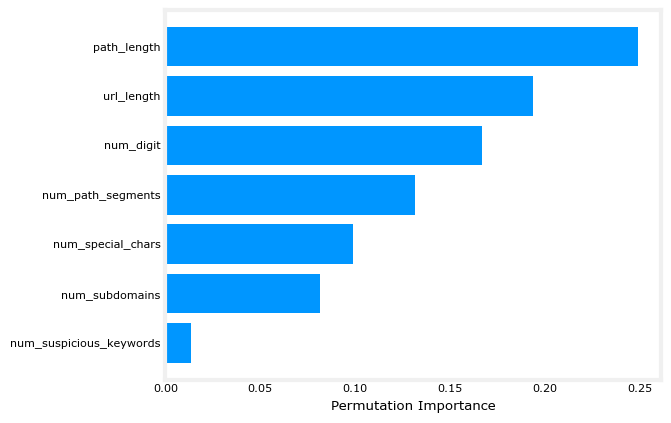

In [85]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, scoring="accuracy")

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [86]:
def extract_features(url):
    feature = {}
    feature['url_length'] = len(url)
    feature['num_special_chars'] = sum(1 for c in url if c in ['?', '=', '&', '%', '@', '-', '_'])
    feature['num_digit'] = sum(c.isdigit() for c in url)
    feature['num_subdomains'] = url.count('.')
    parsed_url = urlparse(url)
    feature['path_length'] = len(parsed_url.path)
    feature['num_path_segments'] = parsed_url.path.count('/')
    suspicious_keywords = ['pay', '.io', 'login', 'secure', 'wallet', 'auth', 'support', 'block']
    feature['num_suspicious_keywords'] = sum(1 for keyword in suspicious_keywords if keyword in url)
    return feature

In [87]:
# url = "https://eezxodullgeunn.webflow.io" # phishing
url = "https://www.google.co.uk/" # Supposedly safe

new_features = extract_features(url)

new_features_df = pd.DataFrame([new_features])

prediction = random_forest_model.predict(new_features_df)

predicted_class = label_encoder.inverse_transform(prediction)

# Output the prediction
# print(f"Prediction for URL '{url3}': {prediction[0]}")
print(f"Prediction for URL '{url}': {predicted_class[0]}")

Prediction for URL 'https://www.google.co.uk/': phishing
